In [2]:
#Include Relevant Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import k as k_B
import ipywidgets as widgets
from ipywidgets import interact

# Modelling of the Velocity Distrubution in Gases
## Tyler Cumming

### Project Synopsis

This project delves into the statistical distributions that describe the motion of particles in an ideal gas, modeled using the **Maxwell-Boltzmann distribution**. This distribution provides a probabilistic view of how particle speeds are spread at a given temperature, based on classical statistical mechanics.

Several distinct velocities can be defined when analyzing particle motion in a gas, including:

- **Most probable speed** ($v_{mp}$): the speed at which the distribution peaks.
- **Root-mean-square speed** ($v_{rms}$): the square root of the average of the squares of particle speeds, representing an effective average speed.

In this project, an ideal gas is simulated, and the statistical relationships between these characteristic velocities are explored. Additionally, the model allows for adjustments to key parameters, such as **temperature** and **molecular mass**, to investigate how these factors influence the velocity distribution and associated physical quantities.


### Theory and Background

The motion of particles at thermal equilibrium can be described using the Maxwell-Boltzmann Distrubtion.

$$f(v) = 4\pi \left( \frac{m}{2\pi k_B T} \right)^{3/2} v^2 e^{-\frac{mv^2}{2k_B T}}$$

Where:

$f(v)$ - The probability density function for finding a specific velocity at some temperature
$m$ - Mass of particle
$k_B$ - Boltzmann's constant
$v$ - Velocity of particle
$T$ - Temperature 

The distrubution is normalised i.e. there is a 100% you will find the particle at some point of the distrubution.

#### Characteristic Velocites

Mean Velocity - the 'average' velocity of the particles calculated using the mean. $$  \bar{v} = \sqrt{\frac{8k_B T}{\pi m}}$$

Most Probable Velocity - the velocity found when maximising $f(v)$. I.e. solving $\frac{df(v)}{dv}=0$. $$v_{mp} = \sqrt{\frac{2k_B T}{m}}$$

Root Mean Square Velocity - The square root of the average of the square of speeds. $$  v_{rms} = \sqrt{\frac{3k_B T}{m}}$$.

All these velocities are correct and give different insights into the statistical nature of the distrubutions of a real ideal gas.

#### Temperature and Mass Dependence

- **Higher temperatures** shift the distribution to higher speeds and broaden the spread of particle velocities.
- **Lighter particles** (smaller \( m \)) move faster on average than heavier ones at the same temperature.

This theoretical framework will be used as the basis for both analytical and numerical simulations in the following sections.

### Distrubution Plot

The Maxwell-Boltzmann Distrubution follows a similar shape to the graph below. This graph also illustrates the positions for the different characteristic velocties of the gas (albeit with slightly different nomencluture as what was defined in the previous section).

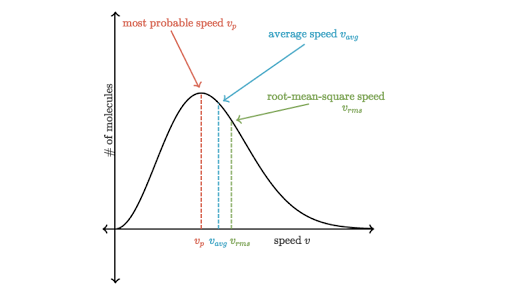

### Numerical Solution

In [6]:
# Parameters
v = np.linspace(0, 2000, 500)  # Range of possible velocities (m/s)

# Define Maxwell-Boltzmann Distribution
def maxwell_boltzmann(v, T, m):
    A = 4 * np.pi * (m / (2 * np.pi * k_B * T))**(3/2)
    return A * v**2 * np.exp(-m * v**2 / (2 * k_B * T))

# Define Characteristic Velocities
def char_v(T, m):
    v_mean = np.sqrt((8 * k_B * T) / (np.pi * m))      # mean velocity
    v_rms = np.sqrt((3 * k_B * T) / m)     # root-mean-square velocity
    v_mp = np.sqrt((2 * k_B * T) / m)       # most probable velocity
    return v_mean, v_rms, v_mp

# Define the plotting function
def plot(T, m):
    # Calculate the Maxwell-Boltzmann distribution
    f_v = maxwell_boltzmann(v, T, m)
    
    # Get characteristic velocities
    v_mean, v_rms, v_mp = char_v(T, m)
    
    # Plotting the distribution and characteristic velocities
    plt.figure(figsize=(10, 6))
    plt.plot(v, f_v, label="Maxwell-Boltzmann Distribution",color='black')
    plt.axvline(v_mp, color='r', linestyle='--', label=f"v_mp = {v_mp:.0f} m/s")
    plt.axvline(v_mean, color='cyan', linestyle='--', label=f"v_mean = {v_mean:.0f} m/s")
    plt.axvline(v_rms, color='g', linestyle='--', label=f"v_rms = {v_rms:.0f} m/s")
    plt.xlabel("Speed (m/s)")
    plt.ylabel("f(v)")
    plt.title(f"Maxwell-Boltzmann Speed Distribution at T={T}K")
    plt.legend()
    plt.grid(True)
    plt.show()

# Create sliders for temperature (T) and mass (m)
temperature_slider = widgets.FloatSlider(value=300, min=100, max=1000, step=10, description="Temperature (K):")
mass_slider = widgets.FloatSlider(value=4.65e-26, min=1e-27, max=1e-25, step=1e-27, description="Mass (kg):")

# Use the interact function to link sliders with the plotting function
interact(plot, T=temperature_slider, m=mass_slider)


interactive(children=(FloatSlider(value=300.0, description='Temperature (K):', max=1000.0, min=100.0, step=10.…

<function __main__.plot(T, m)>

### Conclusion

This project explored the **Maxwell-Boltzmann distribution** of velocities in an ideal gas. By adjusting the **temperature** and **molecular mass**, we observed:

1. **Temperature**: As temperature increases, particle velocities increase, and the distribution becomes broader and flatter. All characteristic velocities (\( v_{mp} \), \( v_{\text{mean}} \), and \( v_{\text{rms}} \)) rise with temperature.
   
2. **Molecular Mass**: Lighter particles move faster at a given temperature, with the distribution shifting to higher velocities for smaller masses.

Overall, the interactive simulation reinforced the impact of temperature and mass on the behavior of gases, demonstrating the importance of statistical distributions in describing particle motion.
